In [1]:
from tqdm import tqdm
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

import os
import cv2
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATADIR = 'Datasets/Train'
CATEGORIES = ['Fire', 'NoFire']

In [3]:
IMG_SIZE = 32
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

In [4]:
training_data = create_training_data()

100%|██████████| 1301/1301 [00:24<00:00, 52.61it/s]


In [5]:
X, y = [], []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X / 255.0

X.shape[1:]

(32, 32, 3)

In [6]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W1217 23:33:46.866964 140410391783232 deprecation.py:506] From /home/hssahrul/miniconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1

In [8]:
history = model.fit(X, y, batch_size=32, epochs=100, validation_split=0.3)

Train on 1696 samples, validate on 727 samples
Epoch 1/100
1696/1696 [==============================] - 3s 2ms/sample - loss: 0.6056 - acc: 0.6863 - val_loss: 0.8263 - val_acc: 0.5750
Epoch 2/100
1696/1696 [==============================] - 2s 1ms/sample - loss: 0.5422 - acc: 0.7600 - val_loss: 0.9832 - val_acc: 0.3521
Epoch 3/100
1696/1696 [==============================] - 2s 1ms/sample - loss: 0.4917 - acc: 0.7901 - val_loss: 0.8000 - val_acc: 0.5227
Epoch 4/100
1696/1696 [==============================] - 2s 1ms/sample - loss: 0.4739 - acc: 0.7930 - val_loss: 0.5681 - val_acc: 0.6657
Epoch 5/100
1696/1696 [==============================] - 2s 1ms/sample - loss: 0.4678 - acc: 0.8013 - val_loss: 0.5123 - val_acc: 0.7001
Epoch 6/100
1696/1696 [==============================] - 2s 1ms/sample - loss: 0.4230 - acc: 0.8284 - val_loss: 0.6324 - val_acc: 0.6479
Epoch 7/100
1696/1696 [==============================] - 2s 1ms/sample - loss: 0.3960 - acc: 0.8296 - val_loss: 0.4958 - val_acc: 0

In [12]:
model_name = 'Fire-32x32-CNN-v1'
model.save(f'Model/{model_name}.h5')

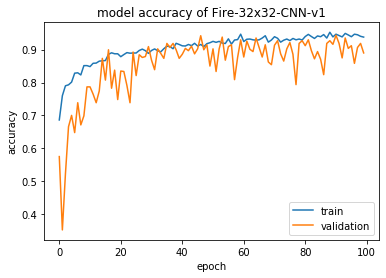

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title(f'model accuracy of {model_name}')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.savefig(f'{model_name}-accuracy')
plt.show()

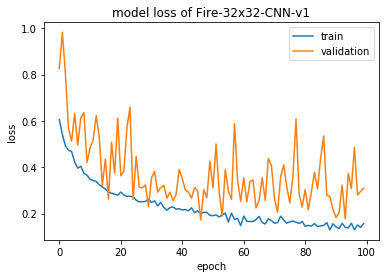

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'model loss of {model_name}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.savefig(f'{model_name}-loss')
plt.show()